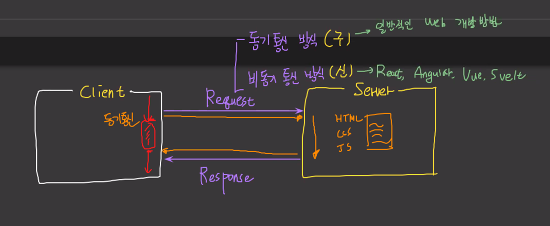

동기통신:여태까지 우리가 배운거랑 똑가틈. 동기통신은 ***서버가 느리면 우리가 아무것도 못하고 기다려야됨.*** 대신 안전함!

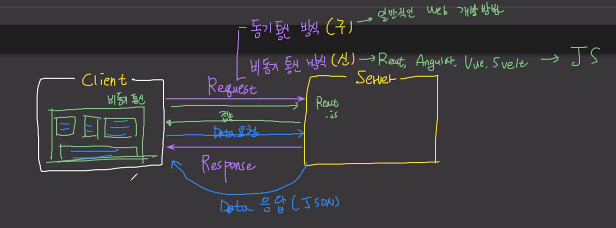

연두색 : 화면 동시통신으로받고


파랑색 : 데이터 비동기로받음

화면은 미리 채워져있음!! 화면은 미리 받아놓고 데이터만 필요할 때 받는다! = ajax

동기(synchronous : 동시에 일어나는)

- 요청을 하면 (바로) 응답을 받는다는 의미. 말 그대로 동시에 일어난다는 뜻. 요청과 그 결과가 동시에 일어난다는 약속. 바로 요청을 하면 시간이 얼마가 걸리던지 요청한 자리에서 결과가 주어져야 한다.

​

비동기(Asynchronous : 동시에 일어나지 않는)

- 동시에 일어나지 않는다를 의미. 요청과 결과가 동시에 일어나지 않을거라는 약속이다. 요청과 응답이 다른 시간대 존재하기 때문에, 요청내용에 대해 지금 바로 혹은 당장 응답받지 않아도 된다. 


In [3]:
import requests

url = 'https://m.stock.naver.com/domestic/index/KOSPI/total'

In [4]:
from bs4 import BeautifulSoup

response = requests.get(url)
page = response.content
soup = BeautifulSoup(page, 'html.parser')
soup
# 값이 비어있어서 뽑을 수가 없음

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no" name="viewport"/>
<meta content="코스피 - 네이버 증권" property="og:title">
<meta content="article" property="og:type"/>
<meta content="https://m.stock.naver.com/domestic/index/KOSPI/total" property="og:url"/>
<meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="네이버증권" property="og:article:author"/>
<meta content="https://m.stock.naver.com" property="og:article:author:url"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:article:thumbnailUrl"/>
<title>네이버 증권</title>
<link href="https://ssl.pstatic.net/imgstock/favi/favicon.ico" rel="shortcut icon"/>
<meta content="네이버 증권" name="apple-mobile-web-app-title"/>
<link href="https://ssl.pstatic.net/imgs

In [5]:
url = 'https://polling.finance.naver.com/api/realtime/domestic/index/KOSPI'


In [6]:
res = requests.get(url)
res

<Response [200]>

# response Header에서 content-type보면 json이었음

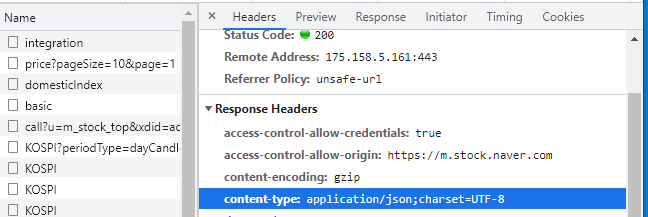

json 형식으로 데이터를 받겠구나!

In [7]:
# preview에서 봤던 내용 파이썬으로 불러오기 성공!

datas = res.json()
datas

{'pollingInterval': 7000,
 'datas': [{'itemCode': 'KOSPI',
   'stockName': '코스피',
   'stockExchangeType': {'code': 'KS',
    'zoneId': 'Asia/Seoul',
    'nationType': 'KOR',
    'delayTime': 0,
    'startTime': '0900',
    'endTime': '1530',
    'closePriceSendTime': '1630',
    'nameKor': '코스피',
    'nameEng': 'KOSPI',
    'nationCode': 'KOR',
    'nationName': '대한민국',
    'name': 'KOSPI'},
   'closePrice': '2,289.88',
   'compareToPreviousClosePrice': '21.48',
   'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
   'fluctuationsRatio': '0.95',
   'openPrice': '2,293.75',
   'highPrice': '2,295.51',
   'lowPrice': '2,273.73',
   'accumulatedTradingVolume': '380,449천주',
   'accumulatedTradingValue': '7,514,117백만',
   'marketStatus': 'OPEN',
   'localTradedAt': '2022-10-31T15:27:05+09:00',
   'symbolCode': 'KOSPI'}],
 'time': '20221031152706'}

In [8]:
data = datas['datas'][0]
data

{'itemCode': 'KOSPI',
 'stockName': '코스피',
 'stockExchangeType': {'code': 'KS',
  'zoneId': 'Asia/Seoul',
  'nationType': 'KOR',
  'delayTime': 0,
  'startTime': '0900',
  'endTime': '1530',
  'closePriceSendTime': '1630',
  'nameKor': '코스피',
  'nameEng': 'KOSPI',
  'nationCode': 'KOR',
  'nationName': '대한민국',
  'name': 'KOSPI'},
 'closePrice': '2,289.88',
 'compareToPreviousClosePrice': '21.48',
 'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
 'fluctuationsRatio': '0.95',
 'openPrice': '2,293.75',
 'highPrice': '2,295.51',
 'lowPrice': '2,273.73',
 'accumulatedTradingVolume': '380,449천주',
 'accumulatedTradingValue': '7,514,117백만',
 'marketStatus': 'OPEN',
 'localTradedAt': '2022-10-31T15:27:05+09:00',
 'symbolCode': 'KOSPI'}

In [9]:
data['closePrice']

'2,289.88'

In [10]:
url = 'https://api.stock.naver.com/chart/domestic/index/KOSPI?periodType=dayCandle'

res = requests.get(url)
res

<Response [200]>

In [11]:
data2 =res.json()['priceInfos']
data2[ :3]

[{'localDate': '20220520',
  'closePrice': 2639.29,
  'openPrice': 2605.78,
  'highPrice': 2641.68,
  'lowPrice': 2605.38,
  'accumulatedTradingVolume': 755652,
  'foreignRetentionRate': 0.0},
 {'localDate': '20220523',
  'closePrice': 2647.38,
  'openPrice': 2651.63,
  'highPrice': 2653.87,
  'lowPrice': 2634.29,
  'accumulatedTradingVolume': 644204,
  'foreignRetentionRate': 0.0},
 {'localDate': '20220524',
  'closePrice': 2605.87,
  'openPrice': 2638.94,
  'highPrice': 2646.99,
  'lowPrice': 2605.87,
  'accumulatedTradingVolume': 851235,
  'foreignRetentionRate': 0.0}]

# 코스피

In [12]:
import pandas as pd
kospi = pd.DataFrame(data2)
kospi

# 바로 데이터프레임화 가능

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
0,20220520,2639.29,2605.78,2641.68,2605.38,755652,0.0
1,20220523,2647.38,2651.63,2653.87,2634.29,644204,0.0
2,20220524,2605.87,2638.94,2646.99,2605.87,851235,0.0
3,20220525,2617.22,2621.75,2630.17,2602.94,712611,0.0
4,20220526,2612.45,2616.99,2641.91,2602.01,595849,0.0
...,...,...,...,...,...,...,...
105,20221025,2235.07,2237.04,2253.24,2230.75,456770,0.0
106,20221026,2249.56,2240.70,2258.11,2234.49,563441,0.0
107,20221027,2288.78,2266.07,2290.56,2262.02,587872,0.0
108,20221028,2268.40,2276.73,2292.65,2266.44,427245,0.0


# USD

In [13]:
# 잘못가져오신건가
# url = "https://m.stock.naver.com/front-api/v1/chart/pricesByPeriod?category=exchange&reutersCode=FX_USDKRW&chartInfoType=marketindex&scriptChartType=day"
# res = requests.get(url)
# datas = res.json()["result"]["priceInfos"]
# usd_df = pd.DataFrame(datas)
# usd_df

In [14]:
url = "https://api.stock.naver.com/chart/domestic/marketindex/FX_USDKRW?periodType=month&range=6"
res = requests.get(url)
datas = res.json()["priceInfos"]
usd_df = pd.DataFrame(datas)
usd_df.tail()

,localDate,closePrice,openPrice,highPrice,lowPrice
118,20221025,1433.0,0.0,1433.0,1433.0
119,20221026,1420.0,0.0,1420.0,1420.0
120,20221027,1423.0,0.0,1423.0,1423.0
121,20221028,1425.5,0.0,1425.5,1425.5
122,20221031,1424.4,0.0,1424.4,1424.4


# 코스닥

In [15]:
url = "https://api.stock.naver.com/chart/domestic/index/KOSDAQ?periodType=dayCandle"

res = requests.get(url)
datas = res.json()["priceInfos"]
kosdaq_df = pd.DataFrame(datas)
kosdaq_df.head()

,localDate,closePrice,openPrice,highPrice,lowPrice,accumulatedTradingVolume,foreignRetentionRate
0,20220520,879.88,866.76,880.17,866.76,1076078,0.0
1,20220523,883.59,883.78,884.39,878.90,1077068,0.0
2,20220524,865.07,881.55,883.11,865.05,1099072,0.0
3,20220525,872.69,869.19,877.71,861.92,989300,0.0
4,20220526,871.43,876.19,885.12,868.81,947423,0.0


### 5월 19일 이후 데이터만 확인

In [16]:
kospi_0519 = kospi[kospi['localDate'] >= "20220719"]
kosdaq_df_0519 = kosdaq_df[kosdaq_df['localDate'] >= "20220719"]
usd_df_0519 = usd_df[usd_df['localDate'] >= "20220719"]

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # matplotlib을 활용해도 seaborn 스타일 사용할거다!

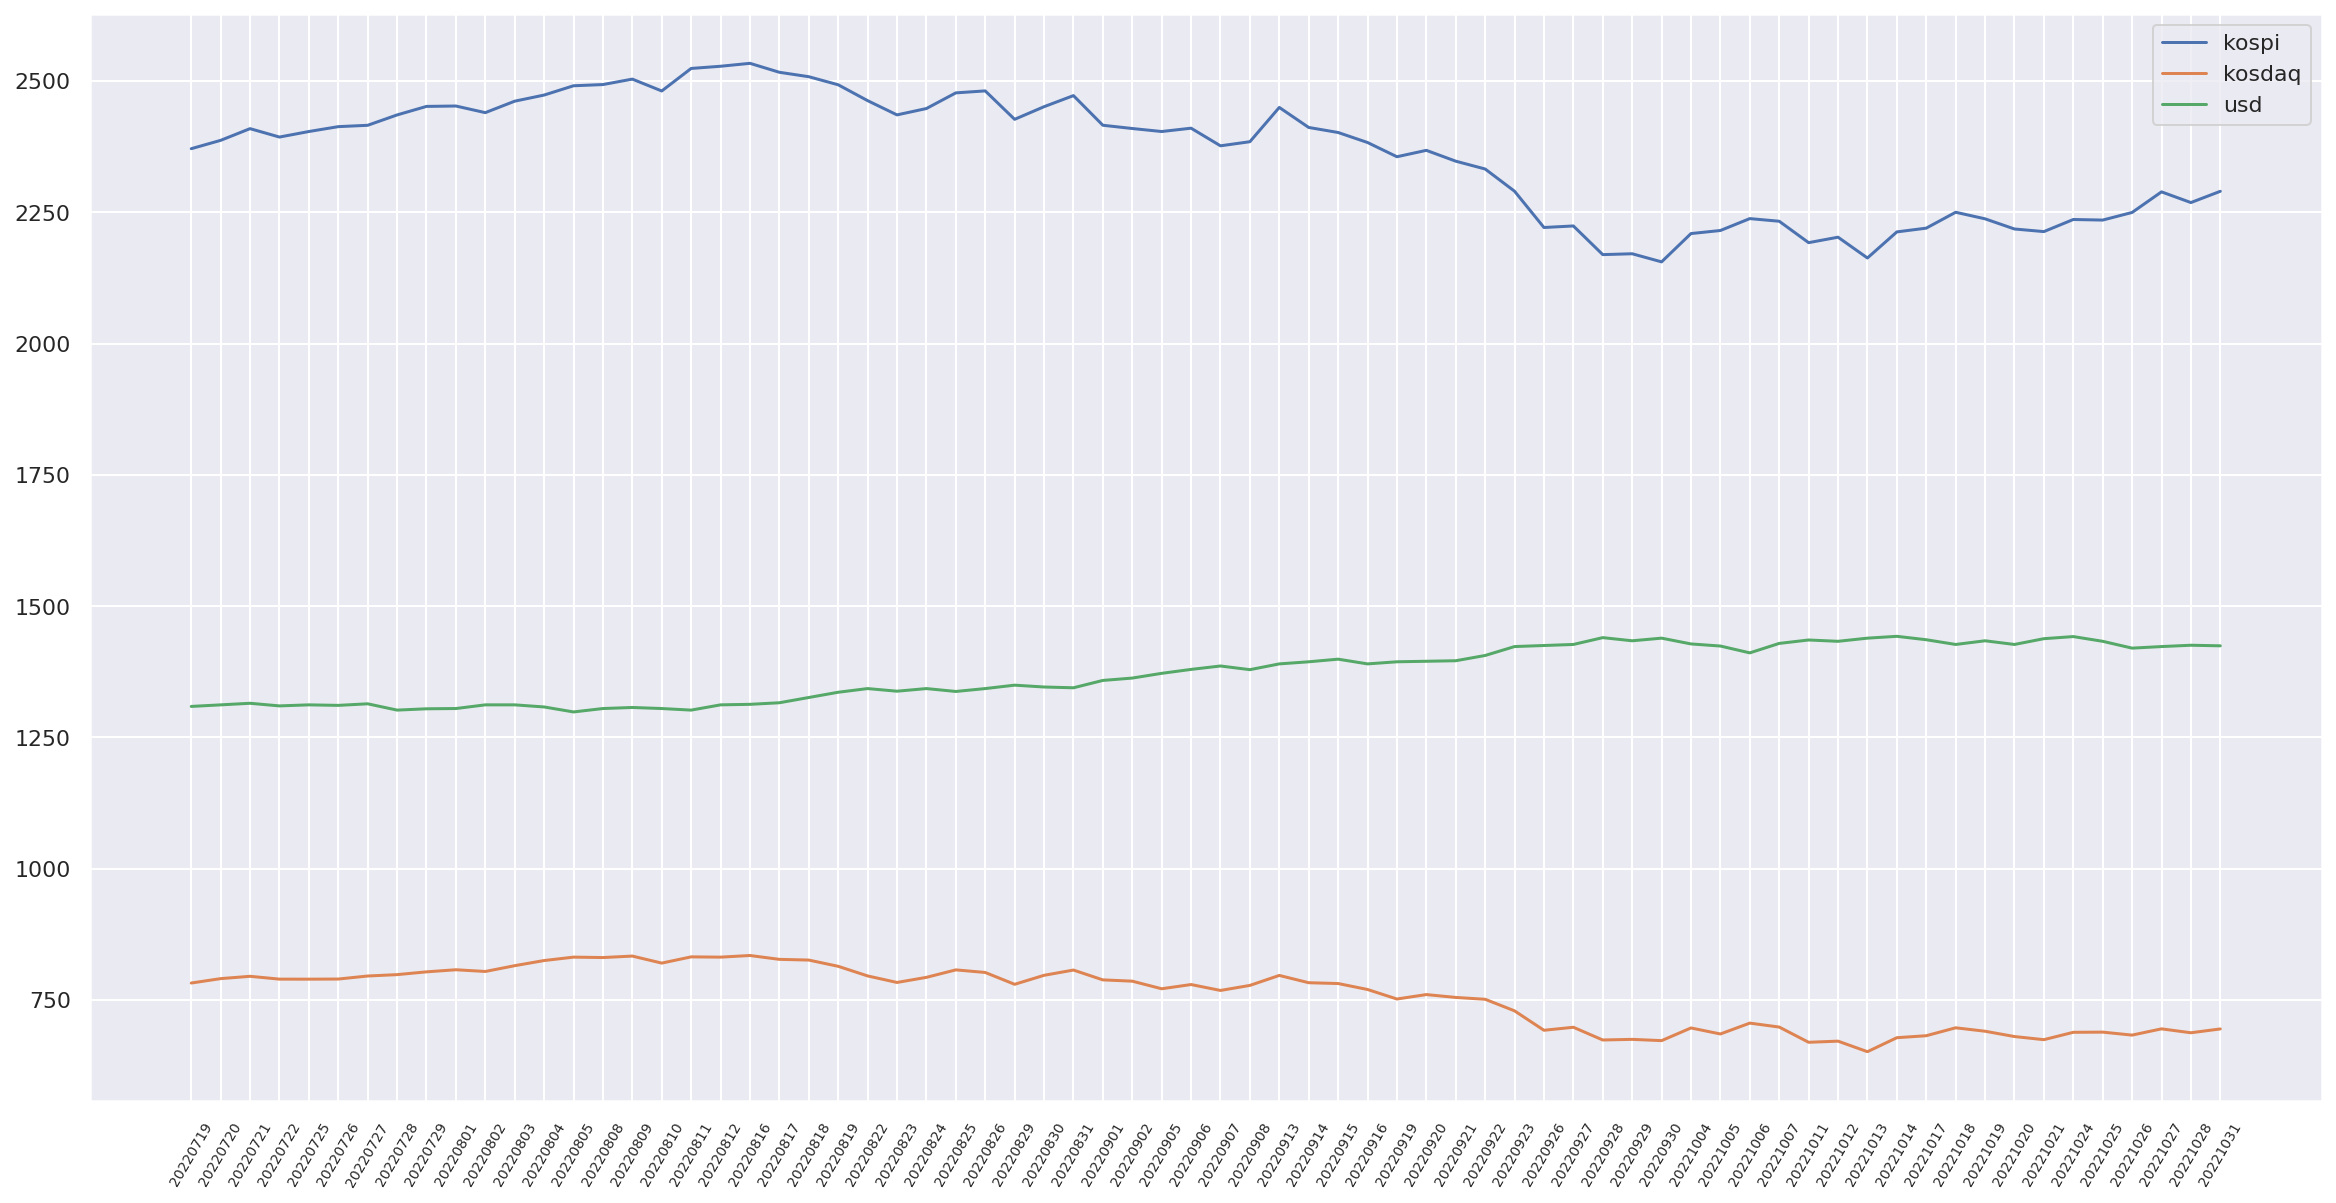

In [18]:
plt.figure(figsize=(20, 10))

plt.plot(kospi_0519["localDate"], kospi_0519["closePrice"], label="kospi")
plt.plot(kosdaq_df_0519["localDate"], kosdaq_df_0519["closePrice"], label="kosdaq")
plt.plot(usd_df_0519["localDate"], usd_df_0519["closePrice"], label="usd")

plt.xticks(rotation=60, fontsize=7)
plt.legend()
plt.show()

In [19]:
# Minmax Scaling 단위가 달라서 비교하기힘드니까 !
from sklearn.preprocessing import minmax_scale

In [20]:
# 최소값0 최대값1로 만들어주는거 minmax_scale

import numpy as np

test_arr = np.array([100, 110, 150, 200])
minmax_scale(test_arr)

array([0. , 0.1, 0.5, 1. ])

In [21]:
minmax_scale(kospi_0519['closePrice'])
# 셋다 민맥스스케일해서 비교할거임!

array([0.57000767, 0.61201492, 0.6710314 , 0.62865381, 0.65656165,
       0.68108351, 0.68788191, 0.74009999, 0.78303309, 0.78501706,
       0.75160702, 0.80935375, 0.84019787, 0.8869931 , 0.89307727,
       0.9204825 , 0.86075179, 0.97423485, 0.98523927, 1.        ,
       0.95489776, 0.93262439, 0.8919927 , 0.81213131, 0.74028516,
       0.77231966, 0.85117583, 0.86114859, 0.71793244, 0.78152528,
       0.83739386, 0.68809354, 0.67169272, 0.6565352 , 0.67330635,
       0.58453033, 0.60521652, 0.77784832, 0.67700976, 0.6516414 ,
       0.60124858, 0.52950824, 0.56175436, 0.50715552, 0.46774066,
       0.35581832, 0.17313441, 0.18085866, 0.03650504, 0.04084332,
       0.        , 0.14255482, 0.15800333, 0.21789276, 0.20461339,
       0.09676481, 0.12427585, 0.01952226, 0.1509404 , 0.1698807 ,
       0.24987435, 0.21678174, 0.16559532, 0.15244822, 0.21339576,
       0.21051239, 0.24884268, 0.35259106, 0.29868   , 0.35550089])

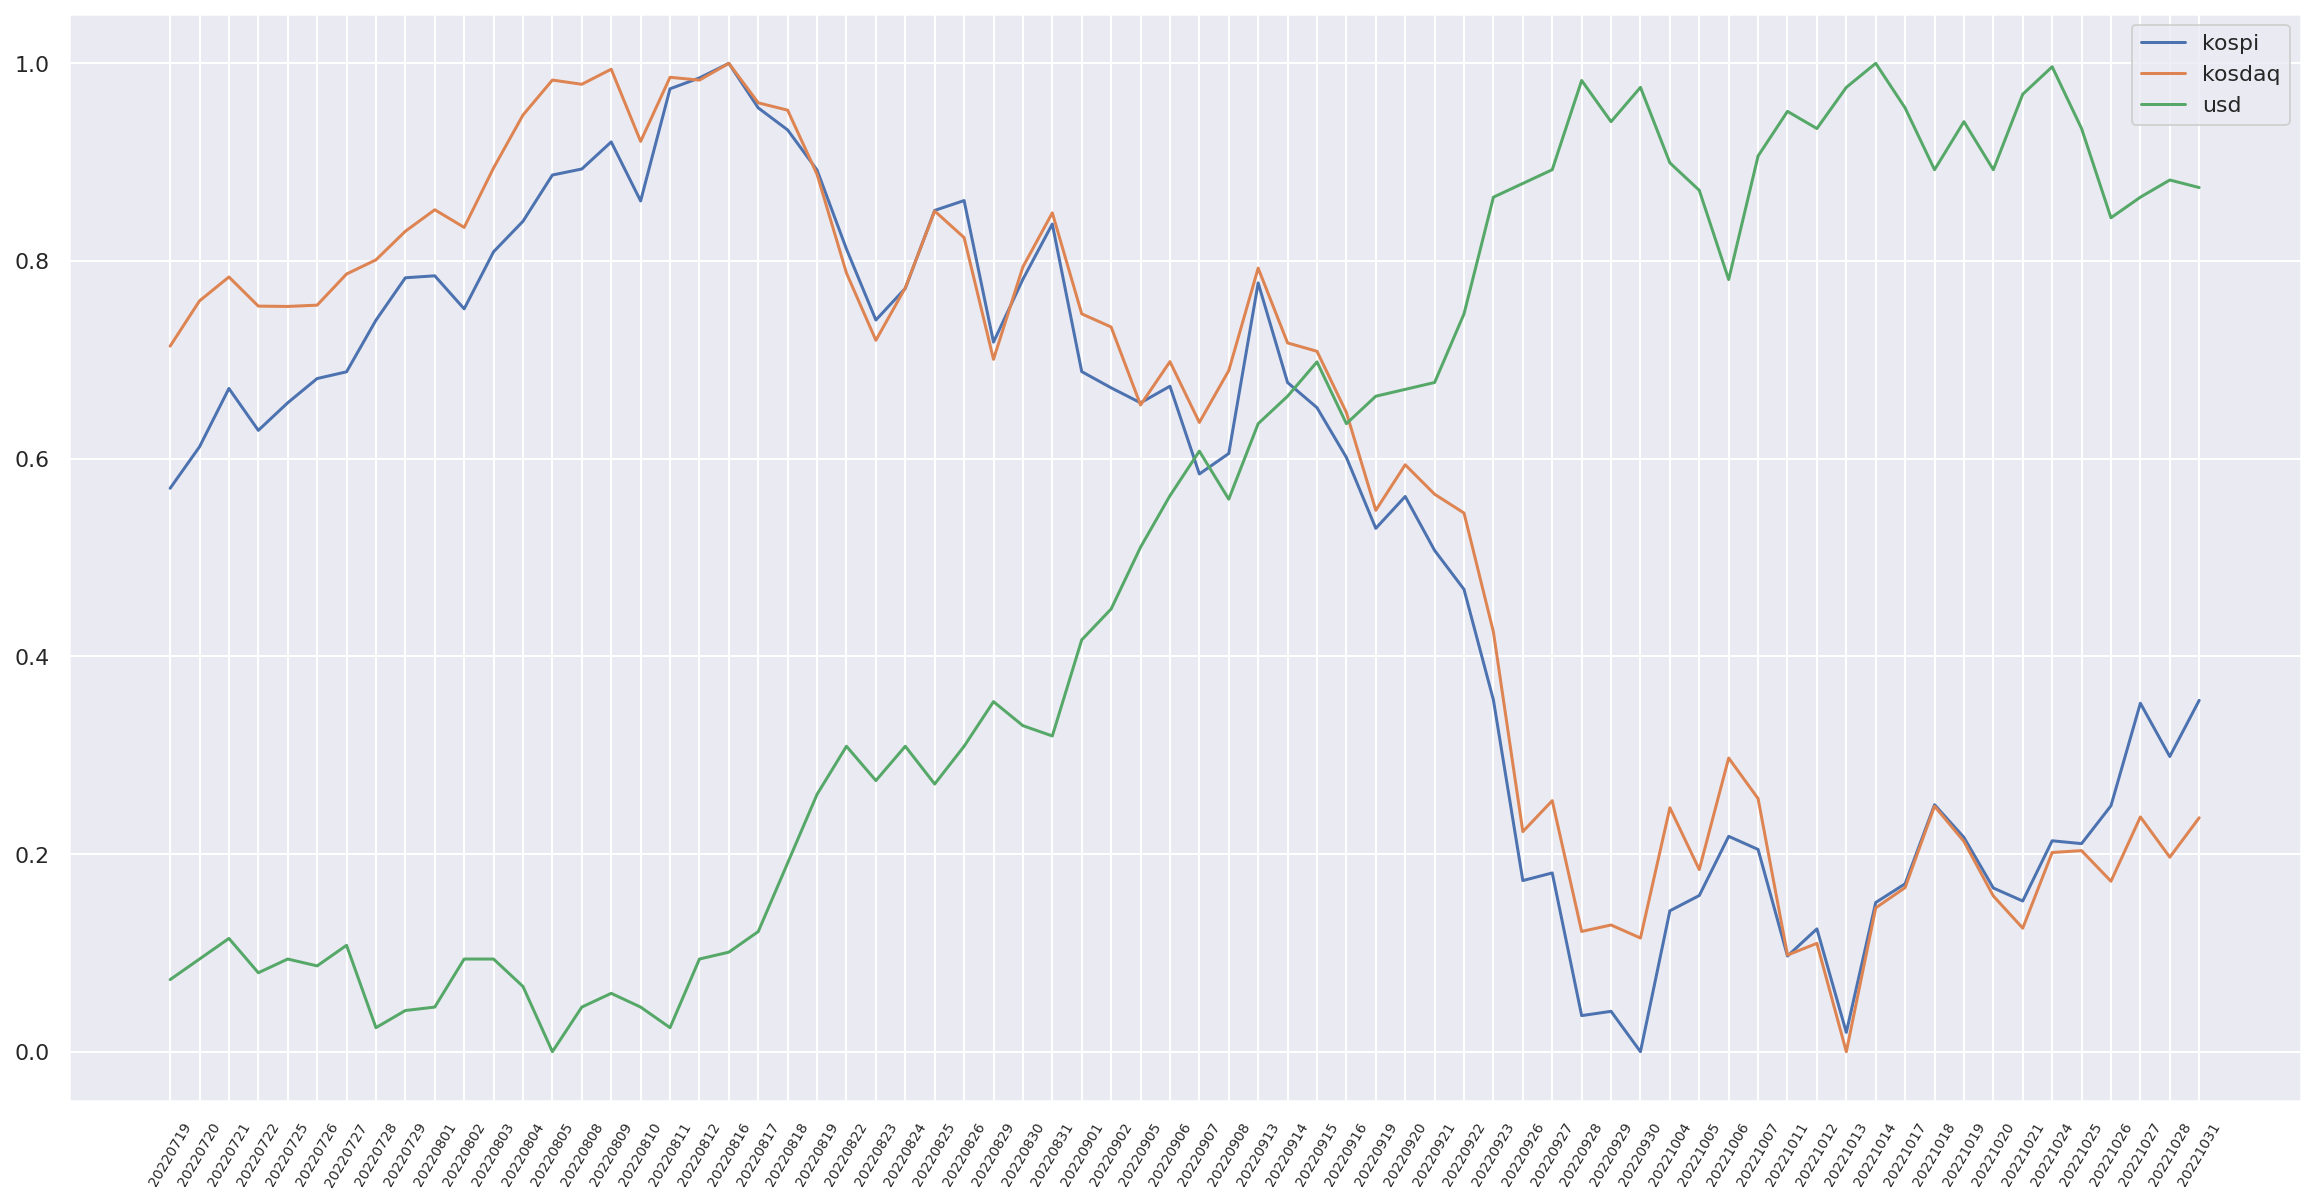

In [24]:
kospi_norm = minmax_scale(kospi_0519['closePrice'])
kosdaq_norm = minmax_scale(kosdaq_df_0519['closePrice'])
usd_norm = minmax_scale(usd_df_0519['closePrice'])



plt.figure(figsize=(20, 10))

plt.plot(kospi_0519["localDate"], kospi_norm, label="kospi")
plt.plot(kosdaq_df_0519["localDate"], kosdaq_norm, label="kosdaq")
plt.plot(usd_df_0519["localDate"], usd_norm, label="usd")

plt.xticks(rotation=60, fontsize=7)
plt.legend()
plt.show()